# Exemplo de coleta de arquivos CSV

Este exemplo mostra como utilizar a biblioteca Pandas para buscar dados de um arquivo CSV que está disponível na internet. Neste caso foi utilizado um dos arquivos disponibilizados pelo Programa Queimadas do INPE no portal de dados abertos [www.inpe.br/queimadas/dados_abertos]

## Importarção de Bibliotecas

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
# Definição de variáveis iniciais

# O endereço https://queimadas.dgi.inpe.br/home/downloadfile?path=/app/api/data/dados_abertos/focos/Diario/focos_abertos_24h_20220217.csv
# quando convertido para um formato da internet tem alguns caracteres substituidos ficando
# da seguinte maneira:

url_csv = 'https://queimadas.dgi.inpe.br/home/downloadfile?path=%2Fapp%2Fapi%2Fdata%2Fdados_abertos%2Ffocos%2FDiario%2Ffocos_abertos_24h_20220217.csv'

In [4]:
print(url_csv)

https://queimadas.dgi.inpe.br/home/downloadfile?path=%2Fapp%2Fapi%2Fdata%2Fdados_abertos%2Ffocos%2FDiario%2Ffocos_abertos_24h_20220217.csv


In [6]:
# Note que o nome do arquivo é mutável e por isso pode ser utilizada uma variável para 
# tratar o processamento dos dados, pois ele tem um conjunto de numeros que representa
# a sequencia ano = 2022, mes = 02 e dia 17

nome_arquivo = 'focos_abertos_24h_20220416.csv'

In [21]:
url_csv = 'https://queimadas.dgi.inpe.br/home/downloadfile?path=/app/api/data/dados_abertos/focos/Diario/{}'.format(nome_arquivo)
print(url_csv)

https://queimadas.dgi.inpe.br/home/downloadfile?path=/app/api/data/dados_abertos/focos/Diario/focos_abertos_24h_20220416.csv


## Leitura dos dados em um dataframe

In [22]:
focos = pd.read_csv(url_csv)

In [23]:
focos.head()

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp,geom
0,0005db6b-7db3-3713-bcd1-f1723f170ecb,8.91,-68.57,2022-04-16 00:06:28,GOES-16,Girardot,Cojedes,Venezuela,96,8,249,7.0,1.5,1.0,NaN,NaN,0101000020E610000014AE47E17A2451C052B81E85EBD12140
1,d64fc93d-9d99-387f-89a2-7f65c8447a5d,11.69,-85.96,2022-04-16 00:06:46,GOES-16,Nandaime,Granada,Nicaragua,58,8,161,NaN,NaN,NaN,NaN,NaN,0101000020E61000003D0AD7A3707D55C0E17A14AE47612740
2,f65673f8-8b64-357a-aedb-ecbaa5703b34,11.71,-85.97,2022-04-16 00:06:46,GOES-16,Nandaime,Granada,Nicaragua,58,8,161,NaN,NaN,NaN,NaN,NaN,0101000020E6100000AE47E17A147E55C0EC51B81E856B2740
3,2e4e1d42-1646-3ada-9793-533bcbe63c45,14.95,-87.50,2022-04-16 00:07:07,GOES-16,Minas de Oro,Comayagua,Honduras,46,4,101,NaN,NaN,NaN,NaN,NaN,0101000020E61000000000000000E055C06666666666E62D40
4,59f83266-a385-39af-a538-63abd09a4ce8,15.15,-91.11,2022-04-16 00:07:08,GOES-16,San Pedro Jocopilas,Quiché,Guatemala,225,14,94,NaN,NaN,NaN,NaN,NaN,0101000020E6100000D7A3703D0AC756C0CDCCCCCCCC4C2E40


In [17]:
import mitosheet
mitosheet.sheet(focos, view_df=True)

OverflowError: Maximum recursion level reached

In [24]:
focos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121330 entries, 0 to 121329
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     121330 non-null  object 
 1   lat                    121330 non-null  float64
 2   lon                    121330 non-null  float64
 3   data_hora_gmt          121330 non-null  object 
 4   satelite               121330 non-null  object 
 5   municipio              121330 non-null  object 
 6   estado                 121330 non-null  object 
 7   pais                   121330 non-null  object 
 8   municipio_id           121330 non-null  int64  
 9   estado_id              121330 non-null  int64  
 10  pais_id                121330 non-null  int64  
 11  numero_dias_sem_chuva  4071 non-null    float64
 12  precipitacao           4071 non-null    float64
 13  risco_fogo             4071 non-null    float64
 14  bioma                  559 non-null 

In [25]:
focos.satelite.value_counts()

NOAA-20      54799
NPP-375      31021
NPP-375D     27479
GOES-16       3792
TERRA_M-M     2605
TERRA_M-T     1357
MSG-03         275
METOP-B          2
Name: satelite, dtype: int64

# Exemplo utilizando a biblioteca GEOPANDAS

In [26]:
import geopandas as gpd

In [34]:
focos_geo = gpd.GeoDataFrame(focos, 
                             geometry=gpd.points_from_xy(focos.lon, focos.lat), 
                             crs='EPSG:4326')
focos_geo.sindex;

In [35]:
focos_geo.head()

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp,geom,geometry
0,0005db6b-7db3-3713-bcd1-f1723f170ecb,8.91,-68.57,2022-04-16 00:06:28,GOES-16,Girardot,Cojedes,Venezuela,96,8,249,7.0,1.5,1.0,NaN,NaN,0101000020E610000014AE47E17A2451C052B81E85EBD12140,POINT (-68.57000 8.91000)
1,d64fc93d-9d99-387f-89a2-7f65c8447a5d,11.69,-85.96,2022-04-16 00:06:46,GOES-16,Nandaime,Granada,Nicaragua,58,8,161,NaN,NaN,NaN,NaN,NaN,0101000020E61000003D0AD7A3707D55C0E17A14AE47612740,POINT (-85.96000 11.69000)
2,f65673f8-8b64-357a-aedb-ecbaa5703b34,11.71,-85.97,2022-04-16 00:06:46,GOES-16,Nandaime,Granada,Nicaragua,58,8,161,NaN,NaN,NaN,NaN,NaN,0101000020E6100000AE47E17A147E55C0EC51B81E856B2740,POINT (-85.97000 11.71000)
3,2e4e1d42-1646-3ada-9793-533bcbe63c45,14.95,-87.50,2022-04-16 00:07:07,GOES-16,Minas de Oro,Comayagua,Honduras,46,4,101,NaN,NaN,NaN,NaN,NaN,0101000020E61000000000000000E055C06666666666E62D40,POINT (-87.50000 14.95000)
4,59f83266-a385-39af-a538-63abd09a4ce8,15.15,-91.11,2022-04-16 00:07:08,GOES-16,San Pedro Jocopilas,Quiché,Guatemala,225,14,94,NaN,NaN,NaN,NaN,NaN,0101000020E6100000D7A3703D0AC756C0CDCCCCCCCC4C2E40,POINT (-91.11000 15.15000)


In [13]:
focos_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 121330 entries, 0 to 121329
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     121330 non-null  object  
 1   lat                    121330 non-null  float64 
 2   lon                    121330 non-null  float64 
 3   data_hora_gmt          121330 non-null  object  
 4   satelite               121330 non-null  object  
 5   municipio              121330 non-null  object  
 6   estado                 121330 non-null  object  
 7   pais                   121330 non-null  object  
 8   municipio_id           121330 non-null  int64   
 9   estado_id              121330 non-null  int64   
 10  pais_id                121330 non-null  int64   
 11  numero_dias_sem_chuva  4071 non-null    float64 
 12  precipitacao           4071 non-null    float64 
 13  risco_fogo             4071 non-null    float64 
 14  bioma       

In [14]:
focos_geo.satelite.value_counts()

NOAA-20      54799
NPP-375      31021
NPP-375D     27479
GOES-16       3792
TERRA_M-M     2605
TERRA_M-T     1357
MSG-03         275
METOP-B          2
Name: satelite, dtype: int64

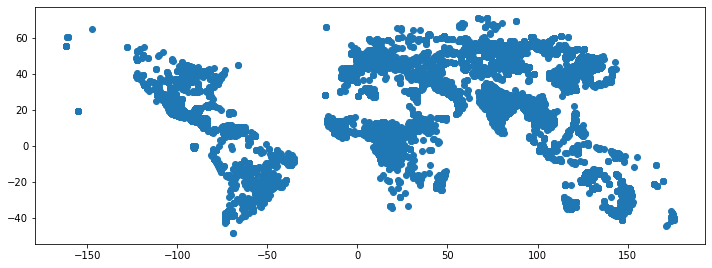

In [15]:
focos_geo.plot(figsize=(12,10));

# Analise espacial

Cruzamento dos pontos com outros dados vetoriais de diferentes fontes

In [36]:
# Leitura de um arquivo no formato geopackage
path_file = './municipalidad.gpkg'

In [37]:
munic_geo = gpd.read_file(path_file)

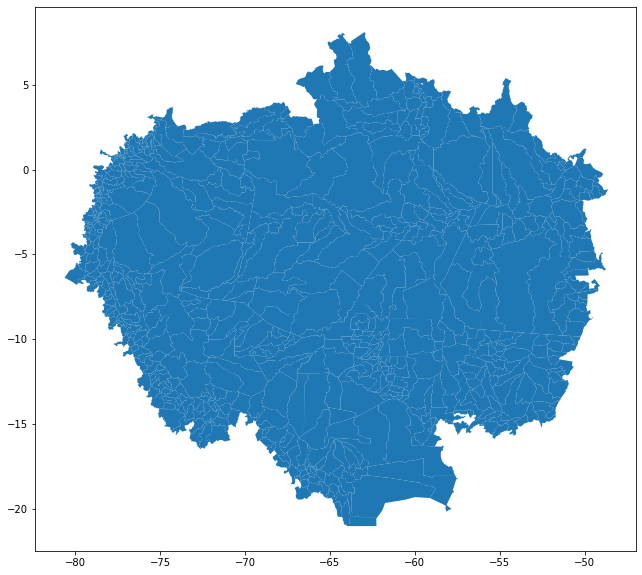

In [38]:
munic_geo.plot(figsize=(12,10));

In [39]:
munic_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        687 non-null    int64   
 1   id_0      687 non-null    int64   
 2   id_1      687 non-null    int64   
 3   id_2      687 non-null    int64   
 4   name_0    687 non-null    object  
 5   name_1    687 non-null    object  
 6   name_2    687 non-null    object  
 7   geometry  687 non-null    geometry
dtypes: geometry(1), int64(4), object(3)
memory usage: 43.1+ KB


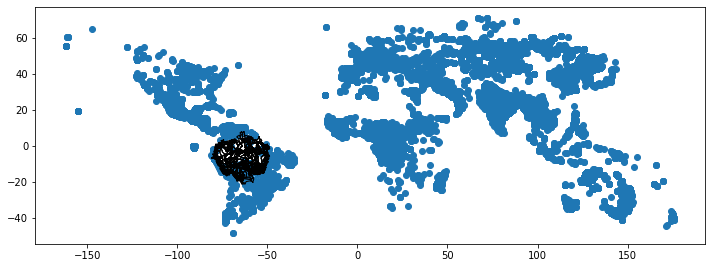

In [40]:
# mostrar os dois dados em uma mesma plotagem
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))

focos_geo.plot(ax=ax)
munic_geo.plot(ax=ax, facecolor='None')
plt.show()

In [41]:
import shapely.speedups
shapely.speedups.enable() 
# enable shapely.speedups which makes queries running faster.

In [42]:
focos_mun = gpd.sjoin(focos_geo, munic_geo,lsuffix='focos', rsuffix='mun')

In [43]:
focos_mun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 411 entries, 604 to 90507
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id_focos               411 non-null    object  
 1   lat                    411 non-null    float64 
 2   lon                    411 non-null    float64 
 3   data_hora_gmt          411 non-null    object  
 4   satelite               411 non-null    object  
 5   municipio              411 non-null    object  
 6   estado                 411 non-null    object  
 7   pais                   411 non-null    object  
 8   municipio_id           411 non-null    int64   
 9   estado_id              411 non-null    int64   
 10  pais_id                411 non-null    int64   
 11  numero_dias_sem_chuva  411 non-null    float64 
 12  precipitacao           411 non-null    float64 
 13  risco_fogo             411 non-null    float64 
 14  bioma                  139 non

In [44]:
focos_mun.head()

,id_focos,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,...,geom,geometry,index_mun,id_mun,id_0,id_1,id_2,name_0,name_1,name_2
604,e47396f4-33e4-39ae-a8bd-5d6154003e94,-1.98,-78.34,2022-04-16 01:05:16,GOES-16,Huamboya,Morona Santiago,Ecuador,148,15,...,0101000020E6100000F6285C8FC29553C0AE47E17A14AEFFBF,POINT (-78.34000 -1.98000),487,14271,68,15,148,Ecuador,Morona Santiago,Huamboya
605,e06c4488-bf34-3962-9084-fb13efa02568,-1.98,-78.36,2022-04-16 01:05:16,GOES-16,Huamboya,Morona Santiago,Ecuador,148,15,...,0101000020E6100000D7A3703D0A9753C0AE47E17A14AEFFBF,POINT (-78.36000 -1.98000),487,14271,68,15,148,Ecuador,Morona Santiago,Huamboya
866,c85e91dc-4a59-33ed-b41e-49e5ab7e1778,-1.98,-78.36,2022-04-16 01:15:16,GOES-16,Huamboya,Morona Santiago,Ecuador,148,15,...,0101000020E6100000D7A3703D0A9753C0AE47E17A14AEFFBF,POINT (-78.36000 -1.98000),487,14271,68,15,148,Ecuador,Morona Santiago,Huamboya
867,a0780656-dc94-3c63-89ab-d85f8722e9a9,-1.98,-78.34,2022-04-16 01:15:16,GOES-16,Huamboya,Morona Santiago,Ecuador,148,15,...,0101000020E6100000F6285C8FC29553C0AE47E17A14AEFFBF,POINT (-78.34000 -1.98000),487,14271,68,15,148,Ecuador,Morona Santiago,Huamboya
905,86ce9e81-1e0e-364d-80a5-7c67dee645a2,-1.98,-78.34,2022-04-16 01:25:15,GOES-16,Huamboya,Morona Santiago,Ecuador,148,15,...,0101000020E6100000F6285C8FC29553C0AE47E17A14AEFFBF,POINT (-78.34000 -1.98000),487,14271,68,15,148,Ecuador,Morona Santiago,Huamboya


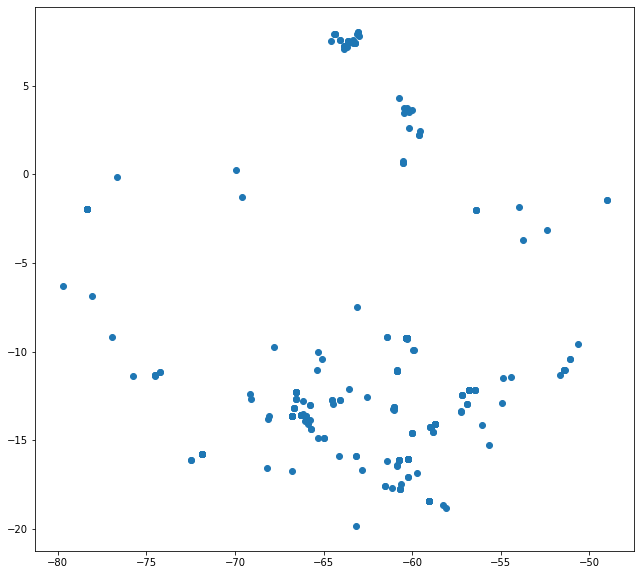

In [45]:
focos_mun.plot(figsize=(12,10));

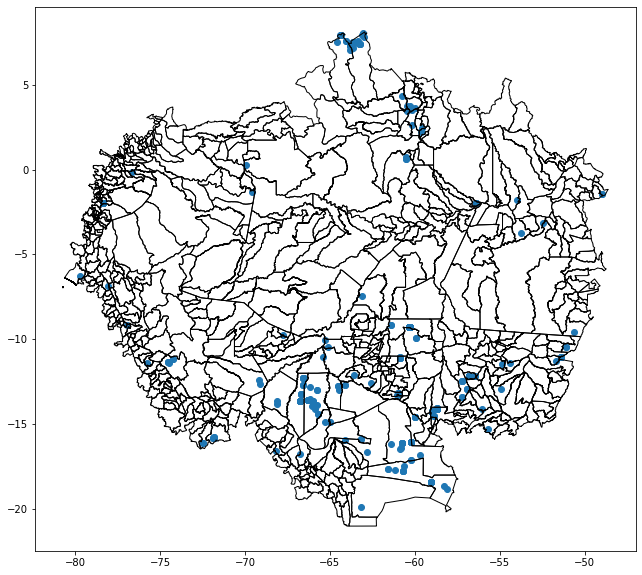

In [46]:
# mostrar os dois dados em uma mesma plotagem
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))

focos_mun.plot(ax=ax)
munic_geo.plot(ax=ax, facecolor='None')
plt.show()

In [48]:
focos_mun.name_0.value_counts()

Bolivia      187
Brasil       139
Ecuador       29
Venezuela     29
Peru          23
Guyana         3
Colombia       1
Name: name_0, dtype: int64

## Manipulação dos dados a partir de um Banco de Dados Geográficos

In [29]:
from sqlalchemy import create_engine, pool

In [30]:
# Definição de constantes
nome_servidor = 'localhost'
nome_usuario_banco = 'x'
senha_usuario_banco = 'x'
porta_banco = 5413
nome_banco = 'api'

In [31]:
engine = create_engine(f'postgresql+psycopg2://{nome_usuario_banco}:{senha_usuario_banco}@{nome_servidor}:{porta_banco}/{nome_banco}', poolclass=pool.NullPool)

In [32]:
engine.connect()
sql = """
select * from dados_geo.baciaamazonica
"""

In [33]:
bacia_geo = gpd.read_postgis(sql, engine, crs='EPSG:4326', index_col='id')

<AxesSubplot:>

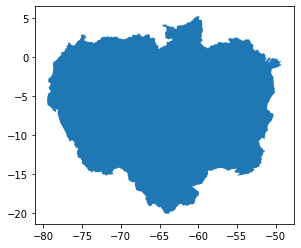

In [34]:
bacia_geo.plot()

In [35]:
engine.connect()
sql = """
select * from dados_geo.paises_ams
"""
paises_geo = gpd.read_postgis(sql, engine,geom_col='geom', crs='EPSG:4326', index_col='id_0')

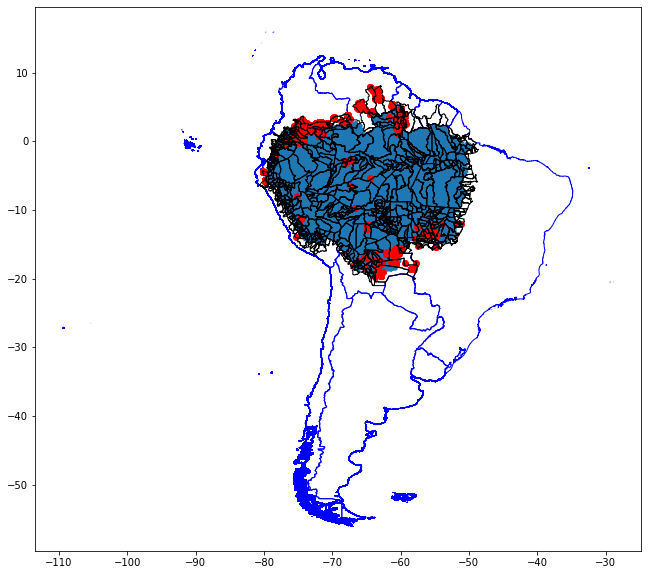

In [36]:
# mostrar os dois dados em uma mesma plotagem
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))

paises_geo.plot(ax=ax, facecolor='None', edgecolor='Blue')
bacia_geo.plot(ax=ax, )
focos_mun.plot(ax=ax, color='red')
munic_geo.plot(ax=ax, facecolor='None')
plt.show()

# Exemplo de saída de dados

In [ ]:
focos_geo.to_sql("focos_bdq", 
                con=db_comp, 
                schema='public', 
                if_exists='append', 
                method='multi', 
                index=False) 

In [38]:
focos_mun.to_file('puntos_amazonia.shp')